## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import os
import zipfile
from datetime import datetime

## Import Dataset

In [22]:
#import data
#specify the file path
file_path = "/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Human_Resources_Data_Set/data/archive.zip"

target_dir = os.path.splitext(file_path)[0]

with zipfile.ZipFile(file_path, "r") as zip_ref:
    zip_ref.extractall(target_dir)

# List the contents of the target directory
print(f"Contents of {target_dir}:")
for root, dirs, files in os.walk(target_dir):
    for file in files:
        print(os.path.join(root, file))

Contents of /Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Human_Resources_Data_Set/data/archive:
/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Human_Resources_Data_Set/data/archive/HRDataset_v14.csv


In [23]:
# Specify the path to the extracted CSV file
csv_file_path = os.path.join(target_dir, "HRDataset_v14.csv")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [24]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [25]:
df.columns = df.columns.str.lower()
df['hispaniclatino'].str.lower()

0      no
1      no
2      no
3      no
4      no
       ..
306    no
307    no
308    no
309    no
310    no
Name: hispaniclatino, Length: 311, dtype: object

In [26]:
#no correspondence of empstatusid
print(df['empstatusid'].unique())

[1 5 3 4 2]


In [27]:
### department ###
df[['deptid','department']].sort_values(by="deptid", ascending=False)
print(df['deptid'].unique())
print(df['department'].unique())

[5 3 4 1 6 2]
['Production       ' 'IT/IS' 'Software Engineering' 'Admin Offices'
 'Sales' 'Executive Office']


In [28]:
###performance###
print(df['perfscoreid'].unique())
print(df['performancescore'].unique())

[4 3 2 1]
['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']


## Data Cleaning/Processing

### Null Values

In [29]:
### edit managerid  null cell. ###
print(df['managerid'].unique())
df[["managerid","managername"]].sort_values(by="managerid", ascending=False)

[22.  4. 20. 16. 39. 11. 10. 19. 12.  7. 14. 18. nan  3.  2.  1. 17.  5.
 21.  6. 15. 13.  9. 30.]


,managerid,managername
276,39.0,Webster Butler
89,39.0,Webster Butler
105,39.0,Webster Butler
206,39.0,Webster Butler
280,39.0,Webster Butler
...,...,...
88,NaN,Webster Butler
135,NaN,Webster Butler
177,NaN,Webster Butler
232,NaN,Webster Butler


In [30]:
### edit managerid  null cell. ###
#select managerid are null and correspondent managername
print(df[pd.isnull(df['managerid'])][['managerid', 'managername']].sort_values(by='managername'))

# Select rows where managername is 'Webster Butler'
webster_butler_rows = df[df['managername'] == 'Webster Butler']

# Check if there are any non-null managerid values for Webster Butler
if not webster_butler_rows['managerid'].isnull().all():
    # Get the first non-null managerid value for Webster Butler
    webster_butler_id = webster_butler_rows['managerid'].dropna().iloc[0]
    print(f"The managerid for Webster Butler is: {webster_butler_id}")
else:
    print("Webster Butler has no non-null managerid.")

     managerid     managername
19         NaN  Webster Butler
30         NaN  Webster Butler
44         NaN  Webster Butler
88         NaN  Webster Butler
135        NaN  Webster Butler
177        NaN  Webster Butler
232        NaN  Webster Butler
251        NaN  Webster Butler
The managerid for Webster Butler is: 39.0


In [31]:
# Assign managerid 39.0 to rows where managername is 'Webster Butler'
df.loc[df['managername'] == 'Webster Butler', 'managerid'] = 39.0
df['managerid'].isnull().unique()

array([False])

In [32]:
### what about null cell in dateoftermination? ###
print(df['dateoftermination'].isnull().value_counts())
df[pd.isnull(df['dateoftermination'])][['dateoftermination', 'termd','termreason']]

True     207
False    104
Name: dateoftermination, dtype: int64


,dateoftermination,termd,termreason
0,NaN,0,N/A-StillEmployed
3,NaN,0,N/A-StillEmployed
5,NaN,0,N/A-StillEmployed
6,NaN,0,N/A-StillEmployed
7,NaN,0,N/A-StillEmployed
...,...,...,...
305,NaN,0,N/A-StillEmployed
306,NaN,0,N/A-StillEmployed
308,NaN,0,N/A-StillEmployed
309,NaN,0,N/A-StillEmployed


In [33]:
# Select rows where dateoftermination is null
null_termination_rows = df[pd.isnull(df['dateoftermination'])]

# Check if all termid values are 0 for these rows
if null_termination_rows['termd'].eq(0).all():
    print("All termid values are 0 for rows where dateoftermination is null.")
else:
    print("Some termid values are not 0 for rows where dateoftermination is null.")
### 0:still employed, 1:NOT EMPLOYED ANYMORE

All termid values are 0 for rows where dateoftermination is null.


### Datetime Format

In [34]:
### total years of employment ###

# Transform date object in datetime format
df[['dateofhire','dateoftermination','lastperformancereview_date']] = df[['dateofhire','dateoftermination','lastperformancereview_date']].apply(pd.to_datetime,errors='coerce')

In [35]:
# calculate total years employees worked 
df['employment_years'] = ((df['dateoftermination'] - df['dateofhire']).dt.days/365).round(2)
df[['dateofhire', 'dateoftermination', 'employment_years']]

,dateofhire,dateoftermination,employment_years
0,2011-07-05,NaT,NaN
1,2015-03-30,2016-06-16,1.22
2,2011-07-05,2012-09-24,1.22
3,2008-01-07,NaT,NaN
4,2011-07-11,2016-09-06,5.16
...,...,...,...
306,2014-07-07,NaT,NaN
307,2008-09-02,2015-09-29,7.08
308,2010-04-10,NaT,NaN
309,2015-03-30,NaT,NaN


In [36]:
df['employment_years'].isnull().value_counts()

True     207
False    104
Name: employment_years, dtype: int64

In [37]:
still_employed = df['dateoftermination'].isnull()

In [38]:
df['dateoftermination'] = pd.to_datetime(df['dateoftermination'])

In [39]:
df['dateofhire'] = pd.to_datetime(df['dateofhire'])

In [40]:
current_date = pd.to_datetime('2023.12.21')

In [41]:
df['employment_years'] = ((df['dateoftermination'] - df['dateofhire']).dt.days/365).round(2)
df.loc[still_employed, 'employment_years'] = ((current_date - df.loc[still_employed, 'dateofhire']).dt.days / 365).round(2)

In [42]:
df[['dateofhire', 'dateoftermination', 'employment_years']]

,dateofhire,dateoftermination,employment_years
0,2011-07-05,NaT,12.47
1,2015-03-30,2016-06-16,1.22
2,2011-07-05,2012-09-24,1.22
3,2008-01-07,NaT,15.96
4,2011-07-11,2016-09-06,5.16
...,...,...,...
306,2014-07-07,NaT,9.46
307,2008-09-02,2015-09-29,7.08
308,2010-04-10,NaT,13.71
309,2015-03-30,NaT,8.73


In [43]:
### dob ###
# Convert 'dob' column to datetime format
df['dob'] = pd.to_datetime(df['dob'])

# Check for values in 'dob' column that are in the future
future_dates = df[df['dob'] > datetime.now()]
print(future_dates)
#70 rows

             employee_name  empid  marriedid  maritalstatusid  genderid  \
8         Bachiochi, Linda  10114          0                0         0   
16        Beak, Kimberly    10023          1                1         0   
17     Beatrice, Courtney   10055          0                0         0   
20         Bernstein, Sean  10046          0                0         1   
21         Biden, Lowan  M  10226          0                2         0   
..                     ...    ...        ...              ...       ...   
290          Vega, Vincent  10144          0                2         1   
296   Wallace, Courtney  E  10274          1                1         0   
301          Wilber, Barry  10048          1                1         1   
303  Williams, Jacquelyn    10264          0                0         0   
304     Winthrop, Jordan    10033          0                0         1   

     empstatusid  deptid  perfscoreid  fromdiversityjobfairid  salary  termd  \
8              3   

In [49]:
### age of employers ###

df['dob'] = pd.to_datetime(df['dob'])
# Identify and assign NaN to future dates in 'dob' column
df.loc[df['dob'] > datetime.now(), 'dob'] = np.nan
current_date = datetime.now()
df['age'] = (current_date - df['dob']).astype('<m8[Y]').fillna(-1).astype(int)

In [45]:
df[['age', 'dob']].head(20)

,age,dob
0,40,1983-07-10
1,48,1975-05-05
2,35,1988-09-19
3,35,1988-09-27
4,34,1989-09-08
5,46,1977-05-22
6,44,1979-05-24
7,40,1983-02-18
8,-1,NaT
9,35,1988-01-07


In [64]:
## transform df[['dateofhire', 'dateoftermination', 'dob']] pd.to_datetime
df[['dateofhire', 'dateoftermination', 'dob']] = df[['dateofhire', 'dateoftermination', 'dob']].apply(pd.to_datetime)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   employee_name               311 non-null    object        
 1   empid                       311 non-null    int64         
 2   marriedid                   311 non-null    int64         
 3   maritalstatusid             311 non-null    int64         
 4   genderid                    311 non-null    int64         
 5   empstatusid                 311 non-null    int64         
 6   deptid                      311 non-null    int64         
 7   perfscoreid                 311 non-null    int64         
 8   fromdiversityjobfairid      311 non-null    int64         
 9   salary                      311 non-null    int64         
 10  termd                       311 non-null    int64         
 11  positionid                  311 non-null    int64         

In [67]:
date_columns = ['dateofhire', 'dateoftermination', 'dob']

In [66]:
df.to_csv('/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Human_Resources_Data_Set/data/cleaned_HR_dataset.csv', index=False)

## Data Distribution

In [68]:
csv_file_path = '/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Human_Resources_Data_Set/data/cleaned_HR_dataset.csv'
df = pd.read_csv(csv_file_path, parse_dates=date_columns)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   employee_name               311 non-null    object        
 1   empid                       311 non-null    int64         
 2   marriedid                   311 non-null    int64         
 3   maritalstatusid             311 non-null    int64         
 4   genderid                    311 non-null    int64         
 5   empstatusid                 311 non-null    int64         
 6   deptid                      311 non-null    int64         
 7   perfscoreid                 311 non-null    int64         
 8   fromdiversityjobfairid      311 non-null    int64         
 9   salary                      311 non-null    int64         
 10  termd                       311 non-null    int64         
 11  positionid                  311 non-null    int64         

In [70]:
# bin age
df['age_binned'] = pd.cut(df.age, bins=4, labels=['18-30', '31-40', '41-50', '51-60'])
df['age_binned'] = df['age_binned'].astype('object')

In [71]:
con_col = df[["salary", "engagementsurvey", "specialprojectscount", "dayslatelast30", 
            "absences", "lastperformancereview_date","employment_years"]]
cat_col = df[["position", "state", "maritaldesc", "racedesc", "employmentstatus",
            "department", "managername", "recruitmentsource", "citizendesc", "age_binned"]]
ord_col = df[["empsatisfaction"]]
bin_col = df[["marriedid", "genderid", "fromdiversityjobfairid", "termd", 
            "hispaniclatino"]]
dt_df = df.select_dtypes(include='datetime')
#termreasons is excluded

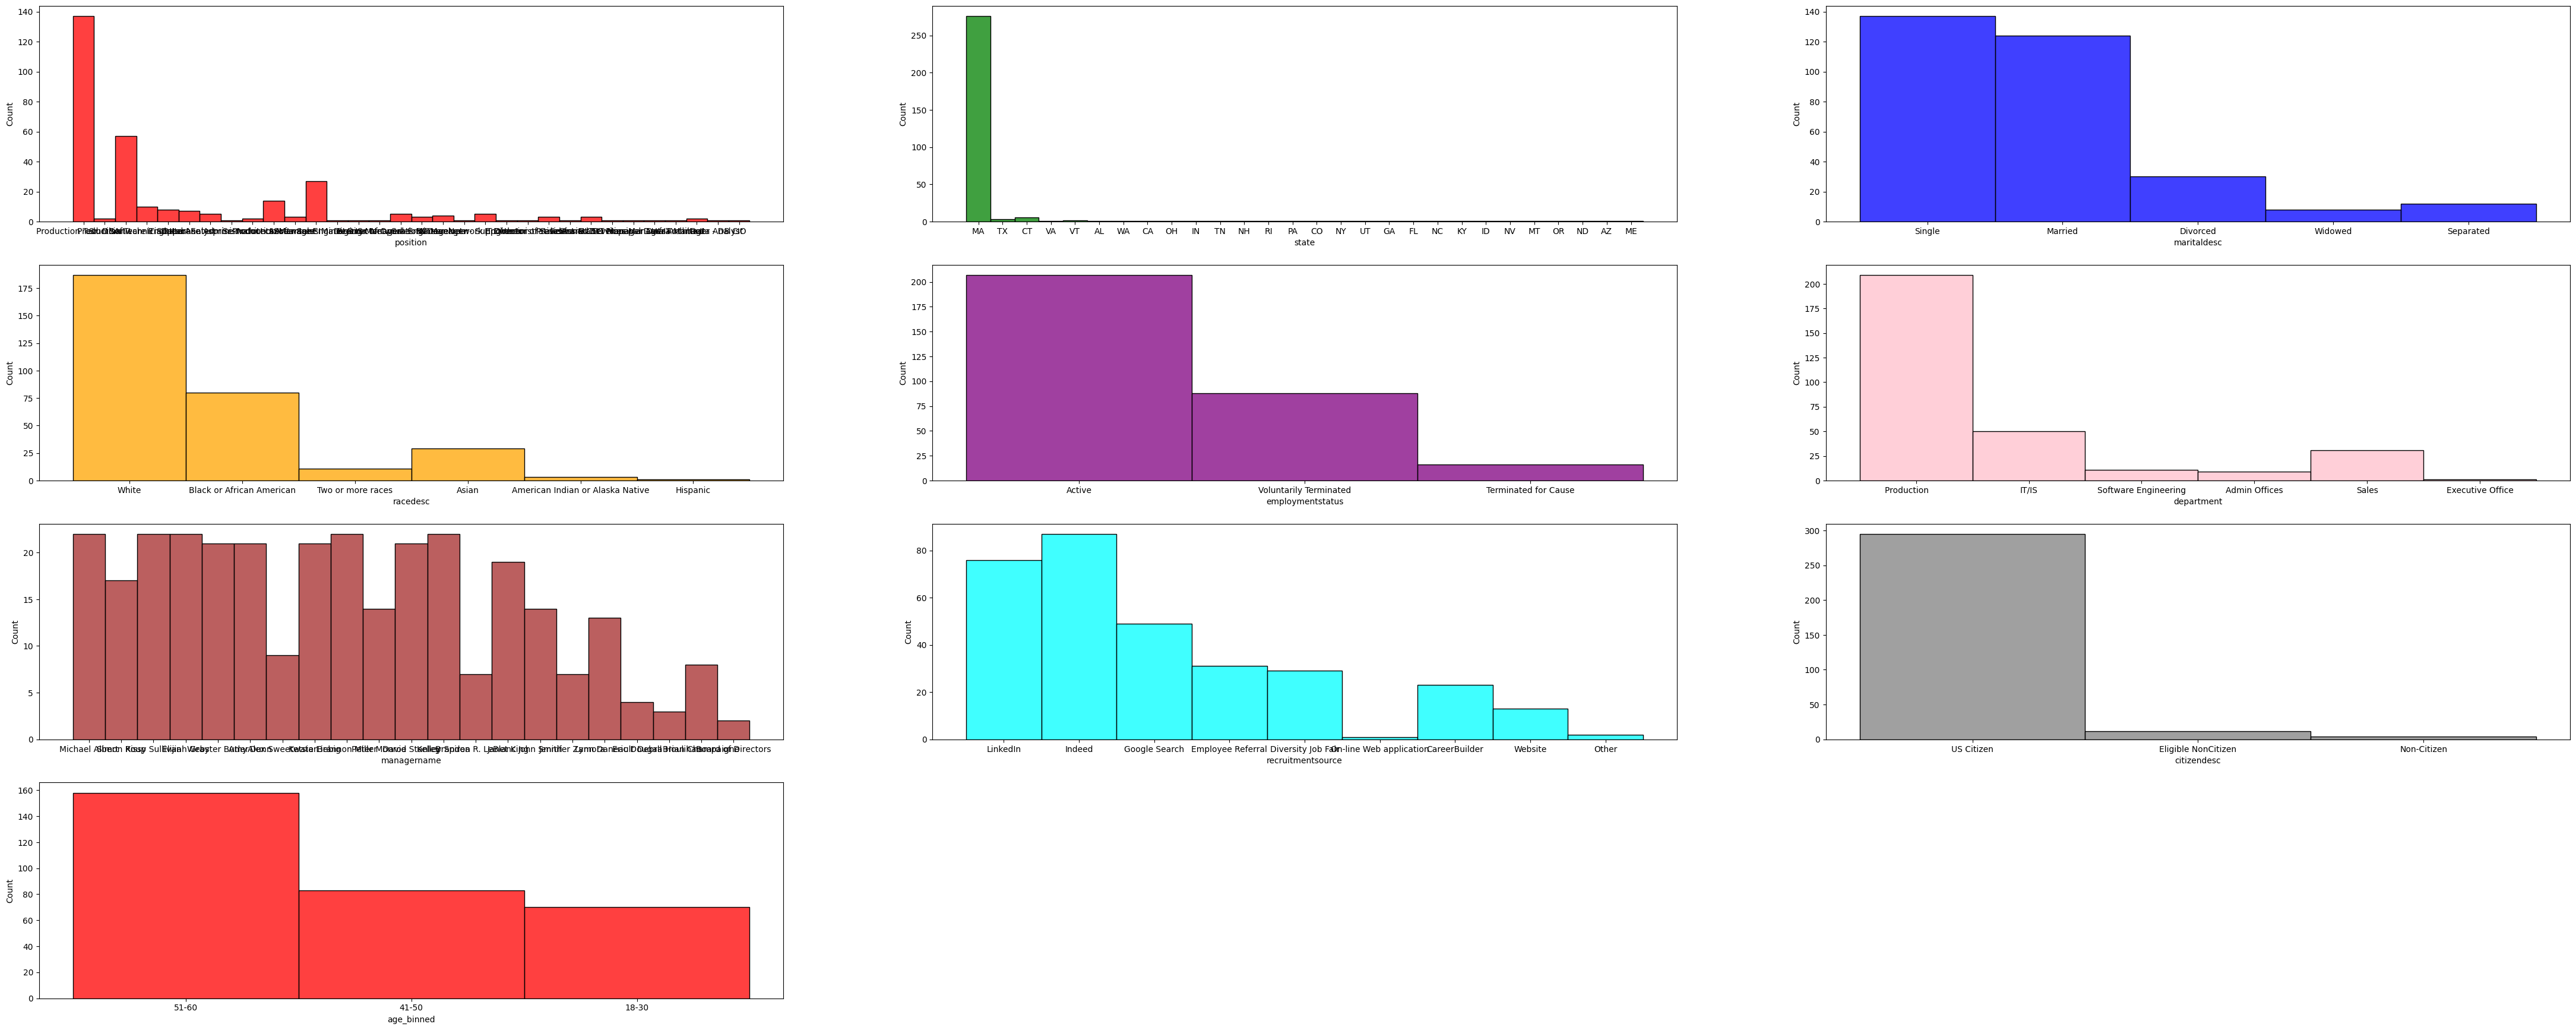

In [75]:
#### plot categorical data ####
plt.figure(figsize=(55,50))
# Define a list of colors you want to use
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'cyan', 'gray']

for i, column in enumerate(cat_col.columns,1):
    plt.subplot(9,3,i)
    sns.histplot(cat_col[column], color=colors[(i - 1) % len(colors)])
#mostly employed in production and from MA state
#mostly single or married
#mostly US citizens
#mostly white
#mostly linkedin or indeed
#some managername have much more employees than others

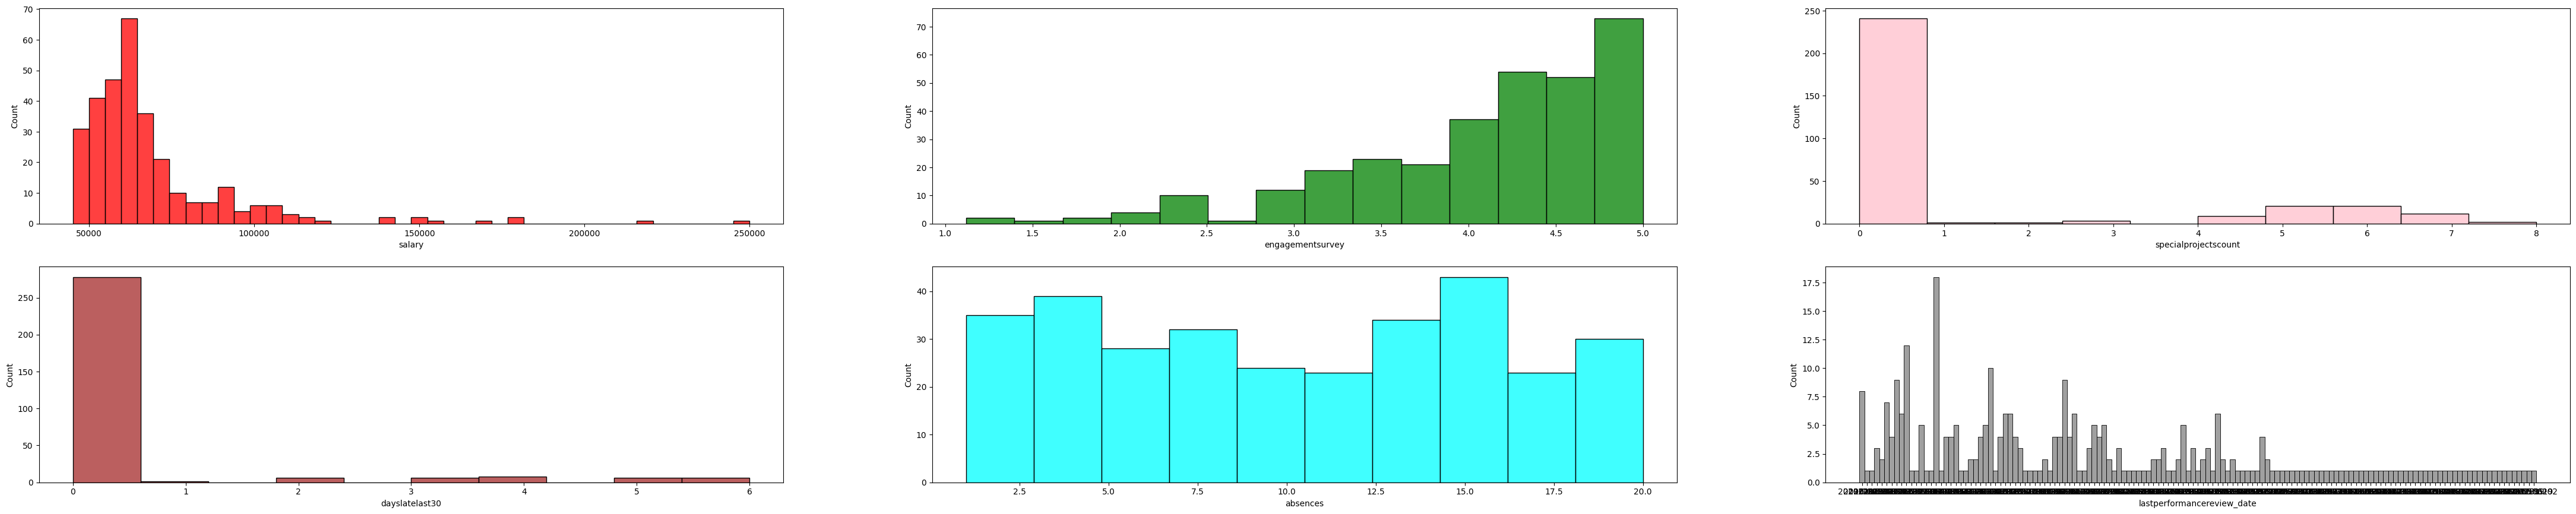

In [79]:
plt.figure(figsize=(55,50))
colors = ['red', 'green', 'pink', 'brown', 'cyan', 'gray', 'blue', 'orange', 'purple']
for i, column in enumerate(con_col.columns,1):
    plt.subplot(9,3,i)
    sns.histplot(con_col[column],color=colors[(i - 1) % len(colors)])
#most relevant info: salary, employment years, age, absences

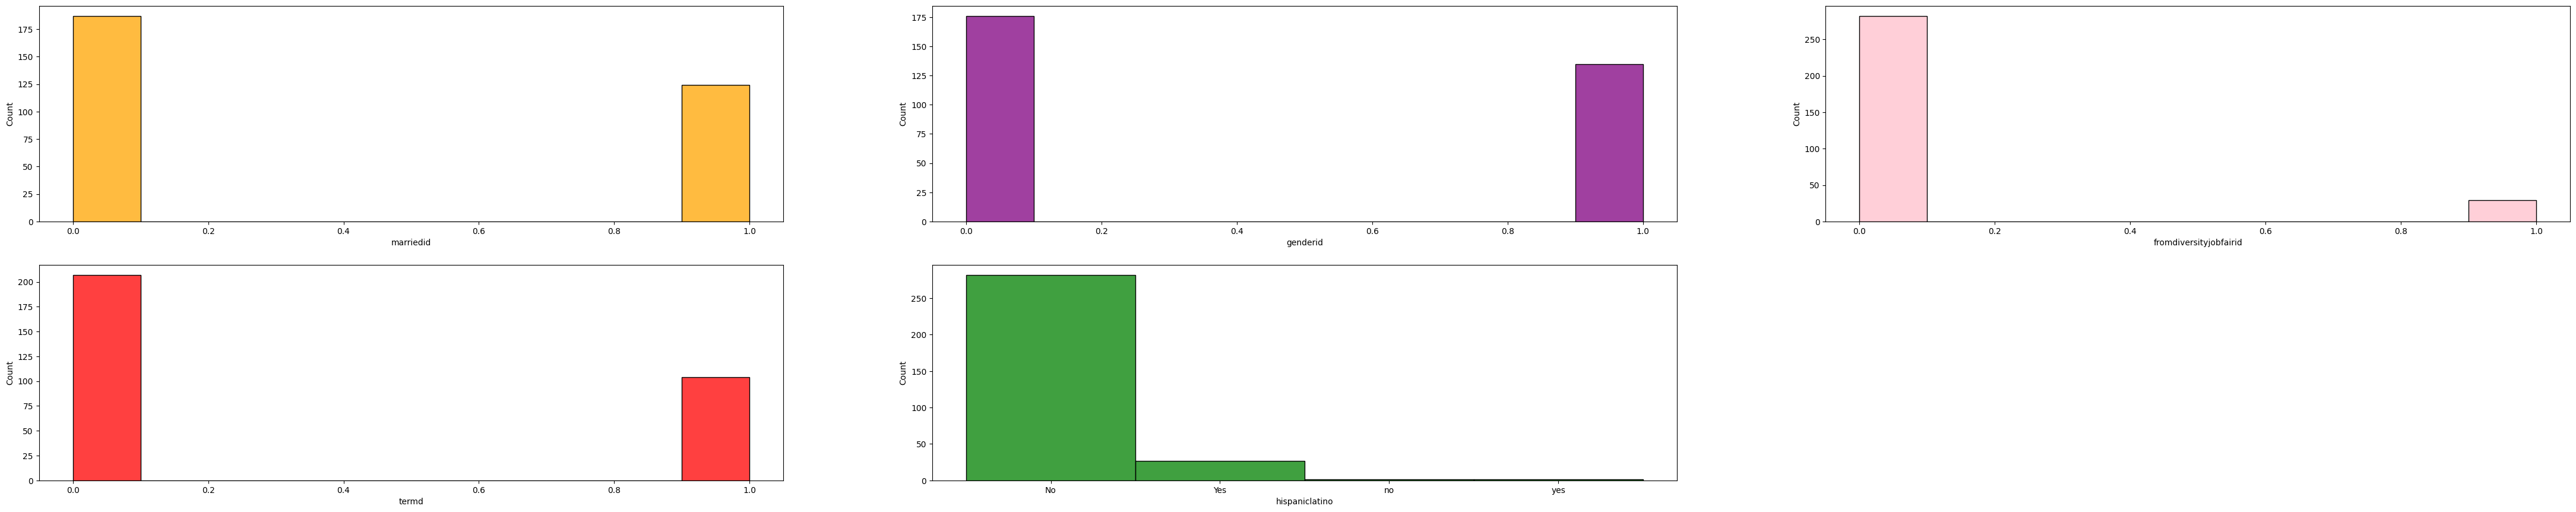

In [78]:
#### plot binary data ####
plt.figure(figsize=(55,50))
# Define a list of colors you want to use
colors = ['orange', 'purple', 'pink', 'red', 'green', 'blue', 'brown', 'cyan', 'gray']

for i, column in enumerate(bin_col.columns,1):
    plt.subplot(9,3,i)
    sns.histplot(bin_col[column], color=colors[(i - 1) % len(colors)])

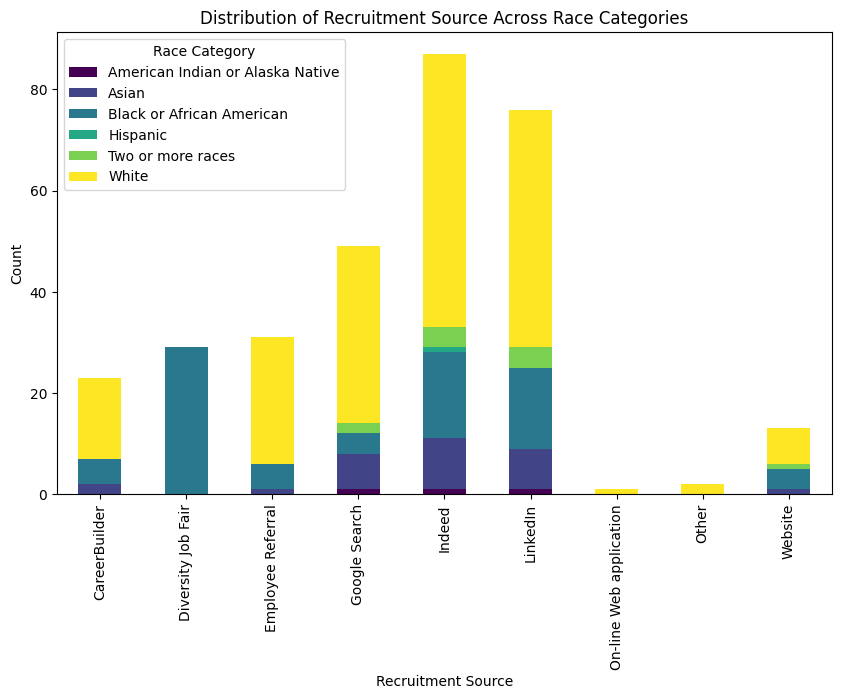

In [75]:
# Count the occurrences of each combination of recruitmentsource and racedesc
grouped_df = df.groupby(['recruitmentsource', 'racedesc']).size().unstack(fill_value=0)

# Plot the grouped bar chart
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Customize the plot
plt.title('Distribution of Recruitment Source Across Race Categories')
plt.xlabel('Recruitment Source')
plt.ylabel('Count')
plt.legend(title='Race Category')

# Show the plot
plt.show()

### corr num features

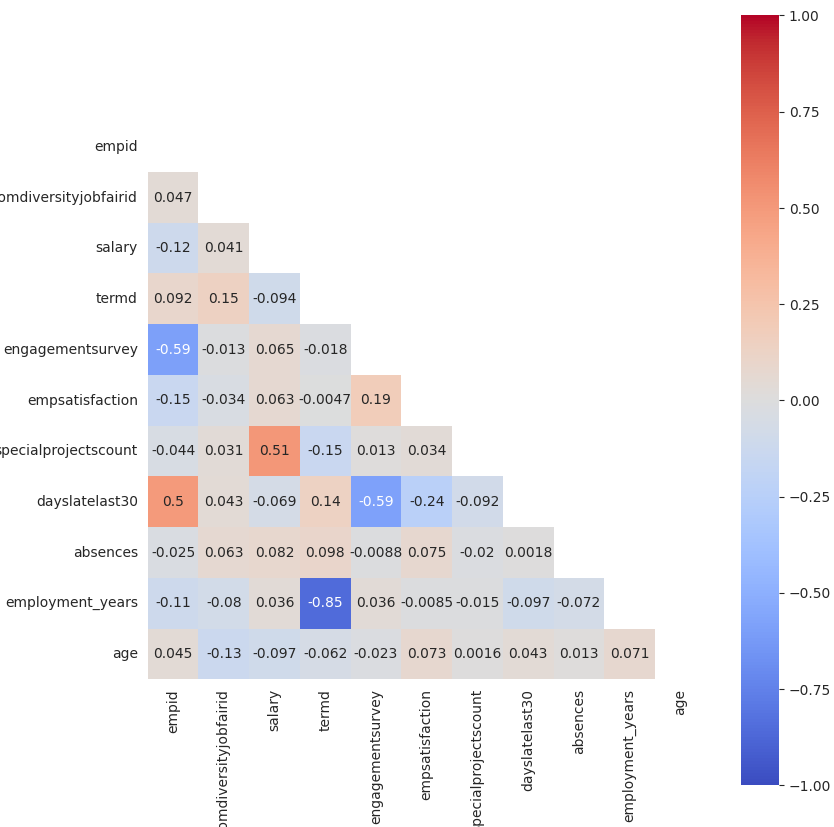

In [12]:
## corr num feat
import statsmodels.api as sm
from scipy.stats import boxcox

corr=num_df.corr()
corr
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax =plt.subplots(figsize=(9,10))
    # Create the heatmap with adjusted font size
    multicollinearity_ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=True, square=True)

# Show the plot
plt.show()

### cat features

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [14]:
cat_df.drop(['dob','dateofhire','dateoftermination','lastperformancereview_date'],axis=1, inplace= True)

In [15]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   employee_name      311 non-null    object
 1   position           311 non-null    object
 2   state              311 non-null    object
 3   sex                311 non-null    object
 4   maritaldesc        311 non-null    object
 5   citizendesc        311 non-null    object
 6   hispaniclatino     311 non-null    object
 7   racedesc           311 non-null    object
 8   termreason         311 non-null    object
 9   employmentstatus   311 non-null    object
 10  department         311 non-null    object
 11  managername        311 non-null    object
 12  recruitmentsource  311 non-null    object
 13  performancescore   311 non-null    object
 14  age_binned         311 non-null    object
dtypes: object(15)
memory usage: 36.6+ KB


In [16]:
#Nominal Encoding
cat_nom = cat_df[['position','sex','maritaldesc','hispaniclatino','racedesc', 'managername',
                 'termreason','employmentstatus','department','recruitmentsource','performancescore',
                 'age_binned']]
cat_nom.head()

,position,sex,maritaldesc,hispaniclatino,racedesc,managername,termreason,employmentstatus,department,recruitmentsource,performancescore,age_binned
0,Production Technician I,M,Single,no,White,Michael Albert,N/A-StillEmployed,Active,Production,LinkedIn,Exceeds,51-60
1,Sr. DBA,M,Married,no,White,Simon Roup,career change,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,51-60
2,Production Technician II,F,Married,no,White,Kissy Sullivan,hours,Voluntarily Terminated,Production,LinkedIn,Fully Meets,41-50
3,Production Technician I,F,Married,no,White,Elijiah Gray,N/A-StillEmployed,Active,Production,Indeed,Fully Meets,41-50
4,Production Technician I,F,Divorced,no,White,Webster Butler,return to school,Voluntarily Terminated,Production,Google Search,Fully Meets,41-50


In [17]:
cat_nom_encoded = pd.get_dummies(cat_nom)
cat_nom_encoded

,position_Accountant I,position_Administrative Assistant,position_Area Sales Manager,position_BI Developer,position_BI Director,position_CIO,position_Data Analyst,position_Data Analyst,position_Data Architect,position_Database Administrator,position_Director of Operations,position_Director of Sales,position_Enterprise Architect,position_IT Director,position_IT Manager - DB,position_IT Manager - Infra,position_IT Manager - Support,position_IT Support,position_Network Engineer,position_President & CEO,position_Principal Data Architect,position_Production Manager,position_Production Technician I,position_Production Technician II,position_Sales Manager,position_Senior BI Developer,position_Shared Services Manager,position_Software Engineer,position_Software Engineering Manager,position_Sr. Accountant,position_Sr. DBA,position_Sr. Network Engineer,sex_F,sex_M,maritaldesc_Divorced,maritaldesc_Married,maritaldesc_Separated,maritaldesc_Single,maritaldesc_Widowed,hispaniclatino_no,hispaniclatino_yes,racedesc_American Indian or Alaska Native,racedesc_Asian,racedesc_Black or African American,racedesc_Hispanic,racedesc_Two or more races,racedesc_White,managername_Alex Sweetwater,managername_Amy Dunn,managername_Board of Directors,managername_Brandon R. LeBlanc,managername_Brannon Miller,managername_Brian Champaigne,managername_David Stanley,managername_Debra Houlihan,managername_Elijiah Gray,managername_Eric Dougall,managername_Janet King,managername_Jennifer Zamora,managername_John Smith,managername_Kelley Spirea,managername_Ketsia Liebig,managername_Kissy Sullivan,managername_Lynn Daneault,managername_Michael Albert,managername_Peter Monroe,managername_Simon Roup,managername_Webster Butler,termreason_Another position,termreason_Fatal attraction,termreason_Learned that he is a gangster,termreason_N/A-StillEmployed,termreason_attendance,termreason_career change,termreason_gross misconduct,termreason_hours,termreason_maternity leave - did not return,termreason_medical issues,termreason_military,termreason_more money,"termreason_no-call, no-show",termreason_performance,termreason_relocation out of area,termreason_retiring,termreason_return to school,termreason_unhappy,employmentstatus_Active,employmentstatus_Terminated for Cause,employmentstatus_Voluntarily Terminated,department_Admin Offices,department_Executive Office,department_IT/IS,department_Production,department_Sales,department_Software Engineering,recruitmentsource_CareerBuilder,recruitmentsource_Diversity Job Fair,recruitmentsource_Employee Referral,recruitmentsource_Google Search,recruitmentsource_Indeed,recruitmentsource_LinkedIn,recruitmentsource_On-line Web application,recruitmentsource_Other,recruitmentsource_Website,performancescore_Exceeds,performancescore_Fully Meets,performancescore_Needs Improvement,performancescore_PIP,age_binned_18-30,age_binned_41-50,age_binned_51-60
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
..

In [28]:
#general merge
hr = pd.concat([cat_nom_encoded,num_df],axis=1)
hr.drop(columns='age',axis=1,inplace=True)
hr.head()

,position_Accountant I,position_Administrative Assistant,position_Area Sales Manager,position_BI Developer,position_BI Director,position_CIO,position_Data Analyst,position_Data Analyst,position_Data Architect,position_Database Administrator,position_Director of Operations,position_Director of Sales,position_Enterprise Architect,position_IT Director,position_IT Manager - DB,position_IT Manager - Infra,position_IT Manager - Support,position_IT Support,position_Network Engineer,position_President & CEO,position_Principal Data Architect,position_Production Manager,position_Production Technician I,position_Production Technician II,position_Sales Manager,position_Senior BI Developer,position_Shared Services Manager,position_Software Engineer,position_Software Engineering Manager,position_Sr. Accountant,position_Sr. DBA,position_Sr. Network Engineer,sex_F,sex_M,maritaldesc_Divorced,maritaldesc_Married,maritaldesc_Separated,maritaldesc_Single,maritaldesc_Widowed,hispaniclatino_no,hispaniclatino_yes,racedesc_American Indian or Alaska Native,racedesc_Asian,racedesc_Black or African American,racedesc_Hispanic,racedesc_Two or more races,racedesc_White,managername_Alex Sweetwater,managername_Amy Dunn,managername_Board of Directors,managername_Brandon R. LeBlanc,managername_Brannon Miller,managername_Brian Champaigne,managername_David Stanley,managername_Debra Houlihan,managername_Elijiah Gray,managername_Eric Dougall,managername_Janet King,managername_Jennifer Zamora,managername_John Smith,managername_Kelley Spirea,managername_Ketsia Liebig,managername_Kissy Sullivan,managername_Lynn Daneault,managername_Michael Albert,managername_Peter Monroe,managername_Simon Roup,managername_Webster Butler,termreason_Another position,termreason_Fatal attraction,termreason_Learned that he is a gangster,termreason_N/A-StillEmployed,termreason_attendance,termreason_career change,termreason_gross misconduct,termreason_hours,termreason_maternity leave - did not return,termreason_medical issues,termreason_military,termreason_more money,"termreason_no-call, no-show",termreason_performance,termreason_relocation out of area,termreason_retiring,termreason_return to school,termreason_unhappy,employmentstatus_Active,employmentstatus_Terminated for Cause,employmentstatus_Voluntarily Terminated,department_Admin Offices,department_Executive Office,department_IT/IS,department_Production,department_Sales,department_Software Engineering,recruitmentsource_CareerBuilder,recruitmentsource_Diversity Job Fair,recruitmentsource_Employee Referral,recruitmentsource_Google Search,recruitmentsource_Indeed,recruitmentsource_LinkedIn,recruitmentsource_On-line Web application,recruitmentsource_Other,recruitmentsource_Website,performancescore_Exceeds,performancescore_Fully Meets,performancescore_Needs Improvement,performancescore_PIP,age_binned_18-30,age_binned_41-50,age_binned_51-60,empid,fromdiversityjobfairid,salary,termd,engagementsurvey,empsatisfaction,specialprojectscount,dayslatelast30,absences,employment_years
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,10026,0,62506,0,4.60,5,0,0,1,12.47
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,10084,0,104437,1,4.96,3,6,0,17,1.22
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,10196,0,64955,1,3.02,3,0,0,3,1.22
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,

In [30]:
hr.set_index('empid',  inplace=True)
hr.sort_index(ascending=True, inplace=True)

In [31]:
hr.head()

,position_Accountant I,position_Administrative Assistant,position_Area Sales Manager,position_BI Developer,position_BI Director,position_CIO,position_Data Analyst,position_Data Analyst,position_Data Architect,position_Database Administrator,position_Director of Operations,position_Director of Sales,position_Enterprise Architect,position_IT Director,position_IT Manager - DB,position_IT Manager - Infra,position_IT Manager - Support,position_IT Support,position_Network Engineer,position_President & CEO,position_Principal Data Architect,position_Production Manager,position_Production Technician I,position_Production Technician II,position_Sales Manager,position_Senior BI Developer,position_Shared Services Manager,position_Software Engineer,position_Software Engineering Manager,position_Sr. Accountant,position_Sr. DBA,position_Sr. Network Engineer,sex_F,sex_M,maritaldesc_Divorced,maritaldesc_Married,maritaldesc_Separated,maritaldesc_Single,maritaldesc_Widowed,hispaniclatino_no,hispaniclatino_yes,racedesc_American Indian or Alaska Native,racedesc_Asian,racedesc_Black or African American,racedesc_Hispanic,racedesc_Two or more races,racedesc_White,managername_Alex Sweetwater,managername_Amy Dunn,managername_Board of Directors,managername_Brandon R. LeBlanc,managername_Brannon Miller,managername_Brian Champaigne,managername_David Stanley,managername_Debra Houlihan,managername_Elijiah Gray,managername_Eric Dougall,managername_Janet King,managername_Jennifer Zamora,managername_John Smith,managername_Kelley Spirea,managername_Ketsia Liebig,managername_Kissy Sullivan,managername_Lynn Daneault,managername_Michael Albert,managername_Peter Monroe,managername_Simon Roup,managername_Webster Butler,termreason_Another position,termreason_Fatal attraction,termreason_Learned that he is a gangster,termreason_N/A-StillEmployed,termreason_attendance,termreason_career change,termreason_gross misconduct,termreason_hours,termreason_maternity leave - did not return,termreason_medical issues,termreason_military,termreason_more money,"termreason_no-call, no-show",termreason_performance,termreason_relocation out of area,termreason_retiring,termreason_return to school,termreason_unhappy,employmentstatus_Active,employmentstatus_Terminated for Cause,employmentstatus_Voluntarily Terminated,department_Admin Offices,department_Executive Office,department_IT/IS,department_Production,department_Sales,department_Software Engineering,recruitmentsource_CareerBuilder,recruitmentsource_Diversity Job Fair,recruitmentsource_Employee Referral,recruitmentsource_Google Search,recruitmentsource_Indeed,recruitmentsource_LinkedIn,recruitmentsource_On-line Web application,recruitmentsource_Other,recruitmentsource_Website,performancescore_Exceeds,performancescore_Fully Meets,performancescore_Needs Improvement,performancescore_PIP,age_binned_18-30,age_binned_41-50,age_binned_51-60,fromdiversityjobfairid,salary,termd,engagementsurvey,empsatisfaction,specialprojectscount,dayslatelast30,absences,employment_years
empid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,72640,0,5.0,3,0,0,14,7.90
10002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,57568,0,5.0,5,0,0,15,11.96
10003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,62910,0,5.0,3,0,0,19,9.46
10004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,

In [32]:
#move termd to the end of the df
termd_column = hr.pop('termd')

# Add the 'termd' column to the end of the DataFrame
hr['termd'] = termd_column

In [33]:
# check for correlation
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

corr=hr.corr()
corr.iloc[-1,:].sort_values(ascending=True)

## highest corr with termd except termreasons:
# recruitmentsource_Google Search
# department_Production
# managername_Webster Butler
# managername_Amy Dunn
# recruitmentsource_Diversity Job Fair
# maritaldesc_Divorced
# dayslatelast30
# managername_Kissy Sullivan
# position_Production Technician II
# performancescore_Needs Improvement

termreason_N/A-StillEmployed                  -1.000000
employmentstatus_Active                       -1.000000
employment_years                              -0.854683
specialprojectscount                          -0.147429
maritaldesc_Single                            -0.134725
department_IT/IS                              -0.124692
recruitmentsource_Indeed                      -0.122885
department_Sales                              -0.122094
recruitmentsource_Employee Referral           -0.122094
position_Area Sales Manager                   -0.121729
managername_Peter Monroe                      -0.121021
recruitmentsource_LinkedIn                    -0.117603
managername_Brian Champaigne                  -0.115174
position_IT Support                           -0.115174
managername_Lynn Daneault                     -0.113991
recruitmentsource_Website                     -0.113991
maritaldesc_Separated                         -0.106613
salary                                        -0

In [41]:
print(hr[['employmentstatus_Voluntarily Terminated','termd']].groupby('employmentstatus_Voluntarily Terminated')['termd'].count())
print(hr[['termreason_Another position','termd']].groupby('termreason_Another position')['termd'].count())
print(hr[['termreason_unhappy','termd']].groupby('termreason_unhappy')['termd'].count())
print(hr[['recruitmentsource_Google Search','termd']].groupby('recruitmentsource_Google Search')['termd'].count())

employmentstatus_Voluntarily Terminated
0    223
1     88
Name: termd, dtype: int64
termreason_Another position
0    291
1     20
Name: termd, dtype: int64
termreason_unhappy
0    297
1     14
Name: termd, dtype: int64
recruitmentsource_Google Search
0    262
1     49
Name: termd, dtype: int64


<Axes: xlabel='termd', ylabel='Count'>

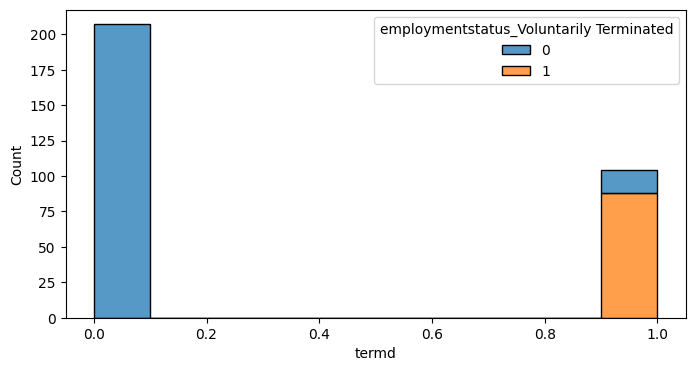

In [43]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(x='termd', hue='employmentstatus_Voluntarily Terminated',data=hr, stat='count', ax = ax, multiple='stack' )

<Axes: xlabel='termd', ylabel='Count'>

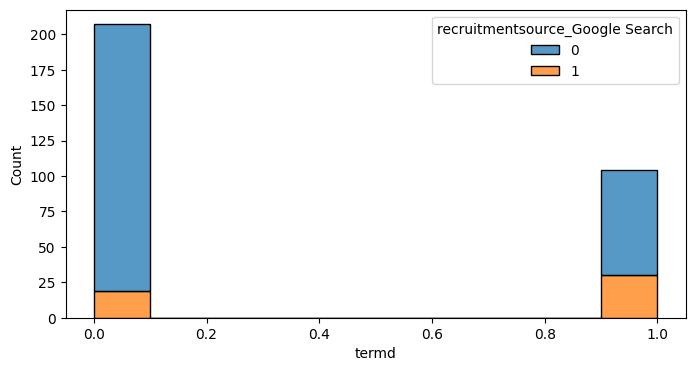

In [40]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(x='termd', hue='recruitmentsource_Google Search',data=hr, stat='count', ax = ax, multiple='stack' )

## Modeling

In [44]:
#XY Split
X = hr.iloc[:, :-1]
y = hr.iloc[:, -1]

In [51]:
#Train/Test Split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LogisticRegression()

(311, 119)
(311,)


In [52]:
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

array([0.98      , 1.        , 0.98      , 0.95918367, 0.93877551])

In [53]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.02


In [54]:
#Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test)

In [60]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
ConfusionMatrixDisplay(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
ConfusionMatrixDisplay(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

,Error_metric,Train,Test
0,Accuracy,1.0,1.0
1,Precision,1.0,1.0
2,Recall,1.0,1.0


Confusion matrix for the train set
[[164   0]
 [  0  84]]


TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'values_format'

In [ ]:
# 